In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing Dataset

In [3]:

dataset=pd.read_csv('50_Startups.csv')
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values
print(x)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

One Hot encoding

In [4]:

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
x=np.array(ct.fit_transform(x))
print(x)


[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

Spilting the Dataset

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Multiple regression

In [7]:

from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [9]:
Y_pred=regression.predict(X_test)
print(Y_pred)

[114664.41715867  90593.15531621  75692.84151574  70221.88679652
 179790.25514872 171576.92018521  49753.5875203  102276.65888936
  58649.37795761  98272.02561131]


visualizing result side by side

In [13]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

[[114664.41715867 105008.31      ]
 [ 90593.15531621  96479.51      ]
 [ 75692.84151574  78239.91      ]
 [ 70221.88679652  81229.06      ]
 [179790.25514872 191050.39      ]
 [171576.92018521 182901.99      ]
 [ 49753.5875203   35673.41      ]
 [102276.65888936 101004.64      ]
 [ 58649.37795761  49490.75      ]
 [ 98272.02561131  97483.56      ]]


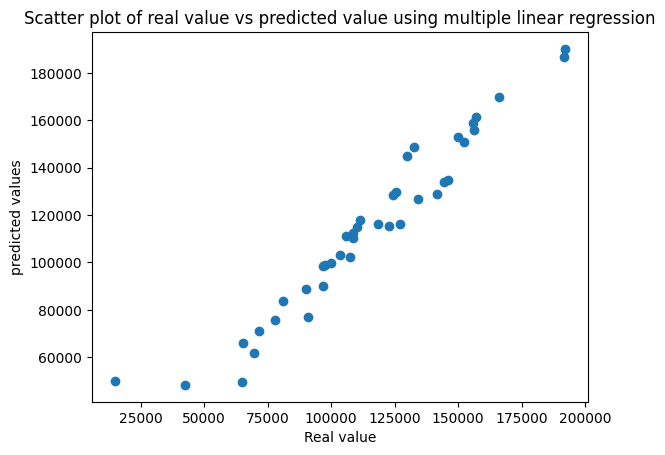

In [22]:
import matplotlib.pyplot as plt
plt.scatter(Y_train, regression.predict(X_train).reshape(-1,1))
plt.xlabel("Real value")
plt.ylabel("predicted values")
plt.title("Scatter plot of real value vs predicted value using multiple linear regression")
plt.show()

checking result , displaying the variance or error

In [24]:
from sklearn.metrics import r2_score
r2_score(Y_test,Y_pred)

0.9649618042060378